In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm
import os

%matplotlib inline

In [2]:
def ricker(t, f):
    w = 2.0 * np.pi * f
    v = w**2 * t**2
    return (1.0 - 0.5 * v) * np.exp(-0.25 * v)

In [3]:
N = 1000
T = 1.0
dt = T / N
t = np.linspace(0.0, T, N)
f = 5.0
shift = -0.24

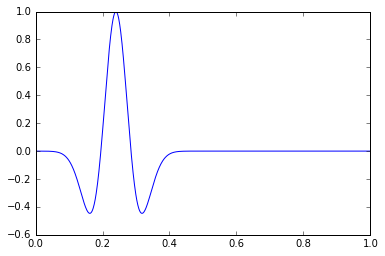

In [4]:
plt.plot(t, ricker(t+shift, f))

In [5]:
Let uo consider Green's function for wave equation in a free-space, that is
G(x,x′,t,t′)=δ((t−t′)−|r−r′|c)4π|r−r′|,
and the solution for point source with the source wavelet S(t), source position r′=(x′,y′,z′), receiver position at r=(x,y,z)
uG(R,τ)=S(τ−R/c)4πR,
where
τ=t−t′,R=|r−r′|.

SyntaxError: invalid syntax (<ipython-input-5-ff429c669b26>, line 1)

In [6]:
np.savetxt('impulse.txt', ricker(t+shift, f), fmt='%1.7e')

In [7]:
def u_G(t, f, r, s, c):
    N = t.shape[0]
    d1 = norm(r - s)
    dt = t - d1 / c
    return ricker(dt, f) / (4.0 * np.pi * d1)

In [8]:
s = np.array([0.0, 0.0, 50.0])
r = np.array([100.0, 0.0, 50.0])
c = 4000.0

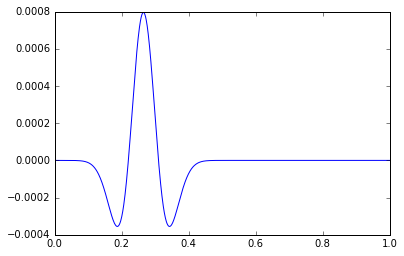

In [9]:
plt.plot(t, u_G(t+shift, f, r, s, c))

In [10]:
h = 10
nx = 200
ny = 200
nz = 200
ox = -1000
oy = -1000
oz = -1000

In [11]:
def madagascar(free='n'):
    cmd = 'sfmath > vel.rsf output=%s n1=%s n2=%s n3=%s d1=%s d2=%s d3=%s o2=%s o3=%s o1=%s' % (c, nz, ny, nx, h, h, h, oy, ox, oz)
    print cmd
    os.system(cmd)
    os.system('sfspike n1=3 nsp=3 k1=1,2,3 mag=%s,%s,%s o1=0 o2=0 o3=0 > sou.rsf' % (s[0], s[1], s[2]))
    os.system('sfspike n1=3 nsp=3 k1=1,2,3 mag=%s,%s,%s o1=0 o2=0 o3=0 > rec.rsf' % (r[0], r[1], r[2]))
    os.system('echo in=impulse.txt n1=1 n2=%s data_format=ascii_float | sfdd form=native | sfput n1=1 n2=%s d2=%s o1=0 label1="Time" unit1="s" > impulse.rsf' % (N, N, dt))
    cmd = 'sfawefd3d < impulse.rsf vel=vel.rsf sou=sou.rsf rec=rec.rsf > dat.rsf verb=y free=%s expl=n snap=y dabc=y jdata=1 jsnap=80000 nbell=1 sinc=y' % free
    print cmd
    os.system(cmd)
    os.system('sfdisfil > dat.asc col=1 format="%e " number=n < dat.rsf')

In [12]:
madagascar()

sfmath > vel.rsf output=4000.0 n1=200 n2=200 n3=200 d1=10 d2=10 d3=10 o2=-1000 o3=-1000 o1=-1000
sfawefd3d < impulse.rsf vel=vel.rsf sou=sou.rsf rec=rec.rsf > dat.rsf verb=y free=n expl=n snap=y dabc=y jdata=1 jsnap=80000 nbell=1 sinc=y


In [13]:
u_m = np.loadtxt('dat.asc') * c**2 / h**3
u_g = u_G(t+shift, f, r, s, c)

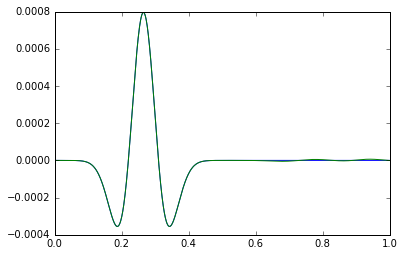

In [14]:
plt.plot(t, u_g)
plt.plot(t, u_m)

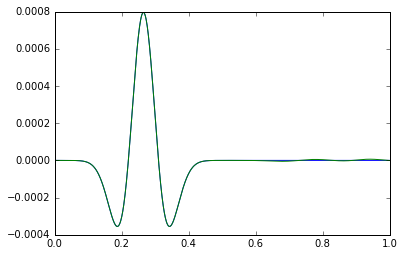

In [15]:
plt.plot(t, u_g)
plt.plot(t, u_m)

In [16]:
err = norm(u_m-u_g)/norm(u_g)*100.0
print 'Error: %s %%' % err

Error: 1.14209746458 %


In [17]:
u_gf = u_G(t+shift, f, r, s, c) - u_G(t+shift, f, r, np.array([s[0], s[1], -s[2]]), c)

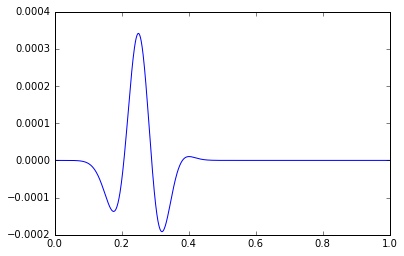

In [18]:
plt.plot(t, u_gf)

In [19]:
h = 10.0
nx = 200
ny = 200
nz = 100
ox = -500
oy = -500
oz = h/2

In [20]:
madagascar('y')

sfmath > vel.rsf output=4000.0 n1=100 n2=200 n3=200 d1=10.0 d2=10.0 d3=10.0 o2=-500 o3=-500 o1=5.0
sfawefd3d < impulse.rsf vel=vel.rsf sou=sou.rsf rec=rec.rsf > dat.rsf verb=y free=y expl=n snap=y dabc=y jdata=1 jsnap=80000 nbell=1 sinc=y


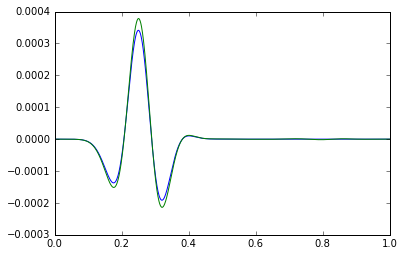

In [21]:
u_m = np.loadtxt('dat.asc') * c**2 / h**3
plt.plot(t, u_gf)
plt.plot(t, u_m)

In [22]:
err = norm(u_m-u_gf)/norm(u_gf)*100.0
print 'Error: %s %% -> shift h/2 upward' % err

Error: 11.0365188586 % -> shift h/2 upward


In [23]:
oz = -h/2
madagascar('y')
u_m = np.loadtxt('dat.asc') * c**2 / h**3
err = norm(u_m-u_gf)/norm(u_gf)*100.0
print 'Error: %s %% -> shift h/2 downward' % err

sfmath > vel.rsf output=4000.0 n1=100 n2=200 n3=200 d1=10.0 d2=10.0 d3=10.0 o2=-500 o3=-500 o1=-5.0
sfawefd3d < impulse.rsf vel=vel.rsf sou=sou.rsf rec=rec.rsf > dat.rsf verb=y free=y expl=n snap=y dabc=y jdata=1 jsnap=80000 nbell=1 sinc=y
Error: 36.3814244595 % -> shift h/2 downward


In [24]:
oz = 0.0
madagascar('y')
u_m = np.loadtxt('dat.asc') * c**2 / h**3
err = norm(u_m-u_gf)/norm(u_gf)*100.0
print 'Error: %s %% -> no shift' % err

sfmath > vel.rsf output=4000.0 n1=100 n2=200 n3=200 d1=10.0 d2=10.0 d3=10.0 o2=-500 o3=-500 o1=0.0
sfawefd3d < impulse.rsf vel=vel.rsf sou=sou.rsf rec=rec.rsf > dat.rsf verb=y free=y expl=n snap=y dabc=y jdata=1 jsnap=80000 nbell=1 sinc=y
Error: 24.2074314133 % -> no shift
